In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline 

In [2]:
dataFolder = Path.cwd().joinpath('Data')

In [3]:
df = pd.read_csv(dataFolder.joinpath('label.csv'))

In [4]:
df = df[['user_id', 'label']] #removing unnecessary columns

In [5]:
df.head()

,user_id,label
0,3187755,unknown
1,12609678,public administration and social service profe...
2,41055794,biological and biomedical sciences
3,8477334,unknown
4,1281279,unknown


In [6]:
len(df.user_id)

53340

In [7]:
len(df.user_id.unique())

52956

In [8]:
df[df.duplicated(['user_id'], keep=False)].sort_values(by='user_id').head(10)

,user_id,label
17638,1220705,unknown
23959,1220705,unknown
4351,1241455,unknown
11979,1241455,unknown
50766,1245485,unknown
46376,1245485,unknown
15946,1538829,social sciences
16362,1538829,public administration and social service profe...
43973,1554997,unknown
2896,1554997,unknown


In [9]:
df[df.duplicated(['user_id'], keep=False)].sort_values(by='user_id').tail(10)

,user_id,label
11156,50398757,unknown
39265,50398757,education
17585,50438677,public administration and social service profe...
53247,50438677,psychology
34720,50469691,biological and biomedical sciences
18737,50469691,unknown
28078,50971835,psychology
9603,50971835,education
39805,52082683,education
397,52082683,psychology


In [10]:
df = df.drop_duplicates(keep='first') # drop duplicate rows but keep the ones with different label

In [11]:
len(df)

53238

In [12]:
len(df.user_id.unique())

52956

In [13]:
userDf = pd.read_csv(dataFolder.joinpath('user_profile.csv'))

In [14]:
userDf = userDf[['user_id', 'gender', 'gpa']]
userDf.head()

,user_id,gender,gpa
0,8838926,female,3.6
1,1525079,female,3.5
2,4513255,female,3.0
3,23554544,female,2.7
4,3416751,female,2.2


In [15]:
userDf = pd.merge(df, userDf, on='user_id')

In [16]:
userDf.head()

,user_id,label,gender,gpa
0,3187755,unknown,female,3.3
1,12609678,public administration and social service profe...,female,3.8
2,41055794,biological and biomedical sciences,male,3.2
3,8477334,unknown,female,3.4
4,1281279,unknown,female,3.5


In [17]:
userDf.label.value_counts()

unknown                                                 26568
psychology                                               7039
education                                                6908
biological and biomedical sciences                       4446
social sciences                                          3940
public administration and social service professions     2354
visual and performing arts                               1798
personal and culinary services                            185
Name: label, dtype: int64

In [18]:
userDf.gender.value_counts()

female    27934
male      25304
Name: gender, dtype: int64

/home/sameer/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Distribution of gender by major')

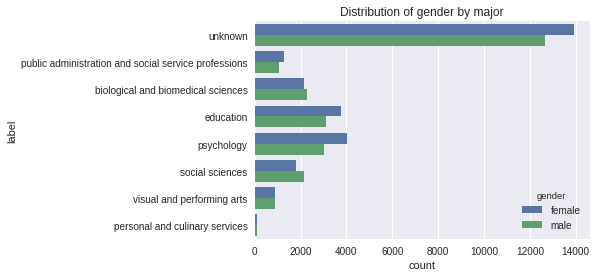

In [19]:
g = sns.countplot(y="label", hue="gender", data=userDf)
g.set_title("Distribution of gender by major" )

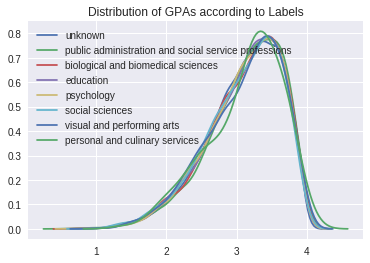

In [20]:
for major in userDf.label.unique().tolist():
    g = sns.kdeplot(userDf[userDf.label==major].gpa, label= major)
g.set_title('Distribution of GPAs according to Labels')
plt.legend(loc='upper left')


In [21]:
with open(dataFolder.joinpath('bk_details.json'), 'r') as f:
    json_data = f.read()
data = json.loads(json_data)

In [22]:
booksDf = pd.DataFrame(data)

In [23]:
booksDf["book_type"] = booksDf.book_subject_code.str[:3]
booksDf.head()

,book_id,book_subject_code,book_title,book_type
0,22250675,EDU029000,Learning Disabilities and Related Mild Disabil...,EDU
1,42510,SCI055000,Physics for Scientists & Engineers (Chs 1-37),SCI
2,46792,ART000000,Drawing to See,ART
3,33143135,REL006000,Living God's Word,REL
4,34466221,HIS037000,Sources in Patterns of World History,HIS


In [24]:
booksDf.book_type.unique()

array(['EDU', 'SCI', 'ART', 'REL', 'HIS', 'HEA', 'REF', 'LAN', 'SOC',
       'PSY', 'SEL', 'MUS', 'FOR', 'LCO', 'POL', 'LAW', 'MED', 'BUS',
       'DRA', 'PER', nan, 'PHI', 'BIO', 'FIC', 'MAT', 'COM', 'SPO', 'BIB',
       'JUV', 'OCC', 'POE', 'LIT', 'CGN', 'ARC', 'FAM', 'NAT', 'TEC',
       'JNF', 'HUM', 'TRU', 'DES', 'TRV', 'CKB', 'PHO', 'STU', 'CRA',
       'GAM', 'PET', 'GAR', 'NON', 'HOM', 'TRA', 'CUR', 'YAN'],
      dtype=object)

In [25]:
# booksDf[booksDf.book_type.isnull()].head()
booksDf = booksDf[booksDf.book_type.notnull()] #remove values where book type is not known

In [26]:
ordersDf = pd.read_csv(dataFolder.joinpath('user_bk_orders.csv'))
ordersDf =  ordersDf.loc[:, ~ordersDf.columns.str.contains('^Unnamed')]
ordersDf.head()

,user_id,book_id
0,35240460,132078
1,26215619,97411
2,1834930,7995
3,40157812,80721
4,41179202,56886


In [27]:
ordersDf = pd.merge(ordersDf, booksDf, on='book_id')
ordersDf.head()

,user_id,book_id,book_subject_code,book_title,book_type
0,35240460,132078,SCI015000,Big Bang,SCI
1,26215619,97411,PER010000,Voice and the Actor,PER
2,1834930,7995,PSY000000,Psychological Testing,PSY
3,40157812,80721,PHI000000,Kant,PHI
4,41179202,56886,PHI000000,Plato,PHI


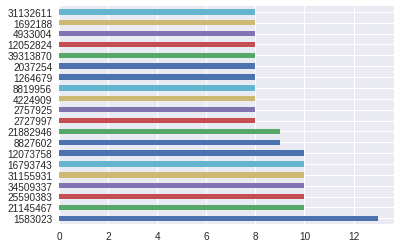

In [28]:
pd.value_counts(ordersDf.user_id)[:20].plot(kind='barh')

In [29]:
ordersDf.book_type.unique()

array(['SCI', 'PER', 'PSY', 'PHI', 'POL', 'EDU', 'MAT', 'FOR', 'TEC',
       'MUS', 'FAM', 'BUS', 'HIS', 'SOC', 'BIO', 'ART', 'LAN', 'JNF',
       'MED', 'LIT', 'REL', 'FIC', 'DRA', 'SPO', 'HEA', 'SEL', 'LCO',
       'JUV', 'BIB', 'TRV', 'CKB', 'NAT', 'POE', 'HUM', 'TRU', 'OCC',
       'REF', 'NON', 'STU', 'HOM', 'PHO', 'TRA', 'COM', 'DES', 'CRA',
       'LAW', 'ARC', 'GAM', 'CGN', 'GAR', 'CUR', 'PET', 'YAN'],
      dtype=object)

In [30]:
# ordersDf[['user_id','book_type']].groupby('book_type').agg('count')
countsDf = ordersDf[['user_id','book_type']].groupby(['user_id','book_type'])['book_type'].count().reset_index(name='counts')
countsDf.head(20)

,user_id,book_type,counts
0,1197529,BUS,1
1,1197915,BUS,1
2,1197915,PSY,1
3,1199673,POL,1
4,1199673,SOC,1
5,1199951,OCC,1
6,1199951,PSY,1
7,1201529,ART,1
8,1201621,EDU,1
9,1201621,POL,1


In [31]:
countsDf = pd.pivot_table(countsDf, index='user_id', columns='book_type', values='counts', fill_value=0)
countsDf = countsDf.rename_axis(None, axis=1).reset_index()
countsDf.head(10)

,user_id,ARC,ART,BIB,BIO,BUS,CGN,CKB,COM,CRA,...,SCI,SEL,SOC,SPO,STU,TEC,TRA,TRU,TRV,YAN
0,1197529,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1197915,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1199673,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1199951,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1201529,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1201621,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1203553,0,0,0,0,0,0,0,0,0,...,3,0,1,0,0,0,0,0,0,0
7,1204353,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,1204575,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1205223,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
userDf = pd.merge(userDf, countsDf, on='user_id')
userDf.head()

,user_id,label,gender,gpa,ARC,ART,BIB,BIO,BUS,CGN,...,SCI,SEL,SOC,SPO,STU,TEC,TRA,TRU,TRV,YAN
0,3187755,unknown,female,3.3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,12609678,public administration and social service profe...,female,3.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41055794,biological and biomedical sciences,male,3.2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,8477334,unknown,female,3.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1281279,unknown,female,3.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
genderMapping = {'male' : 1, 'female' : 0} #convert gender to binary value
userDf = userDf.replace({'gender':genderMapping})
userDf.head()

,user_id,label,gender,gpa,ARC,ART,BIB,BIO,BUS,CGN,...,SCI,SEL,SOC,SPO,STU,TEC,TRA,TRU,TRV,YAN
0,3187755,unknown,0,3.3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,12609678,public administration and social service profe...,0,3.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41055794,biological and biomedical sciences,1,3.2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,8477334,unknown,0,3.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1281279,unknown,0,3.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
testDf = userDf[userDf.label=='unknown']
trainDf = userDf[userDf.label!='unknown']

In [35]:
sorted(trainDf.label.unique().tolist())

['biological and biomedical sciences',
 'education',
 'personal and culinary services',
 'psychology',
 'public administration and social service professions',
 'social sciences',
 'visual and performing arts']

In [36]:
labelMapping = {'biological and biomedical sciences' : 0,
     'education' : 1,
     'personal and culinary services' : 2,
     'psychology' : 3,
     'public administration and social service professions' : 4,
     'social sciences' : 5,
     'visual and performing arts' : 6}

In [37]:
# baseline is the % of majority class
print("Baseline: {}%".format(len(trainDf[trainDf.label=='psychology'])/len(trainDf)*100))

Baseline: 26.41118396261964%


In [38]:
trainY = trainDf.label
# trainY = trainY.replace(labelMapping)
trainX = trainDf.drop(['label', 'user_id'], axis=1)
# trainX = trainX.as_matrix()

### KNN


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [40]:
knn.fit(trainX, trainY) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
predicted = knn.predict(trainX)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(knn, trainX, trainY, cv=5)

In [43]:
print("5 Fold CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

5 Fold CV Accuracy: 0.38 (+/- 0.01)


In [44]:
from sklearn.metrics import classification_report
print("classification_report: \n ")
print(classification_report(trainY, predicted))

classification_report: 
 
                                                      precision    recall  f1-score   support

                  biological and biomedical sciences       0.43      0.59      0.50      4417
                                           education       0.50      0.60      0.54      6872
                      personal and culinary services       0.34      0.13      0.19       185
                                          psychology       0.49      0.49      0.49      7009
public administration and social service professions       0.31      0.21      0.25      2345
                                     social sciences       0.42      0.29      0.34      3922
                          visual and performing arts       0.49      0.21      0.30      1788

                                         avg / total       0.45      0.46      0.45     26538



In [49]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# prepare configuration for cross validation test with basic classifier
num_folds = 5
num_instances = len(trainX)
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC()))


In [ ]:
# evaluate basic models without hypertuning
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    print('evaluating {}'.format(name))
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, trainX, trainY, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

evaluating LR
LR: 0.443440 (0.006067)
evaluating KNN
KNN: 0.375613 (0.008383)
evaluating DT
DT: 0.388010 (0.005999)
evaluating NB
NB: 0.441782 (0.006123)
evaluating SVM


In [ ]:
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()